In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter

In [2]:
def mouse_event(event, x, y, flags, param):
    if pt[0] > (data_num-1):
        return
    if event == cv2.EVENT_LBUTTONUP:
        points[0][pt[0]] = [x,y]
        cv2.circle(img, (x,y), 5, (0,255,0), -1)
        pt[0] += 1

def show(t_img,gray=False,text=None,s=None,c=1):
    fig = plt.figure(figsize=(6,6),dpi=200)
    show_img=np.copy(t_img)
    if c==-1:
        show_img=cv2.cvtColor(show_img,cv2.COLOR_BGR2RGB)
    plt.imshow(show_img)
    
    if gray!=False:
        plt.gray()
    plt.show()


def gray_check(im):
    im[im<0]=0
    return im

        
def edge_injection(img):
    dx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    grad = np.sqrt(dx ** 2 + dy ** 2)
    return grad

def to_binary(ori_img,th=20):
    if len(ori_img.shape)==3:
        raise Exception("グレースケールにしてください")
    new_img=np.copy(ori_img)
    
    new_img[new_img[:,:]<th]=0
    new_img[new_img[:,:]>=th]=255
    return new_img

def cut(ori_img,cut_c="r",cut_val=100):
    new_img=np.copy(ori_img)
    if cut_c=="r":
        new_img[new_img[:,:,0]<cut_val]=[0,0,0]
    if cut_c=="g":
        new_img[new_img[:,:,1]<cut_val]=[0,0,0]
    if cut_c=="b":
        new_img[new_img[:,:,2]<cut_val]=[0,0,0]
    if cut_c=="bl":
        new_img[new_img[:,:]<cut_val]=0
    return new_img

def measure_s(img,c="r",th=200,res=0):
    threshold=th
    mu_scale=50/200
    if c=="r":
        s=np.count_nonzero([img[:,:,0]>threshold])
    elif c=="g":
        s=np.count_nonzero([img[:,:,1]>threshold])
    elif c=="b":
        s=np.count_nonzero([img[:,:,2]>threshold])
    elif c=="bl":
        #グレースケール画像に対しては閾値の設定をしなければならない。
        if threshold>100:
            raise Exception("Error 閾値")
        s=np.count_nonzero([img[:,:]>threshold])
    if res==0:
        print("マスクエリア:対応カラー{}ピクセル".format(s))
        print("マスクエリア：µ変換:{}µ㎡".format(s*mu_scale**2))
    else:
        return s*mu_scale**2
    
def sharp(im):
    kernel = np.full((3, 3), -1)
    kernel[1][1]=9
    return cv2.filter2D(im, -1, kernel)

def load(img_path,flag=1):
    img=cv2.imread(img_path)
    if flag==1:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

1回目抽出


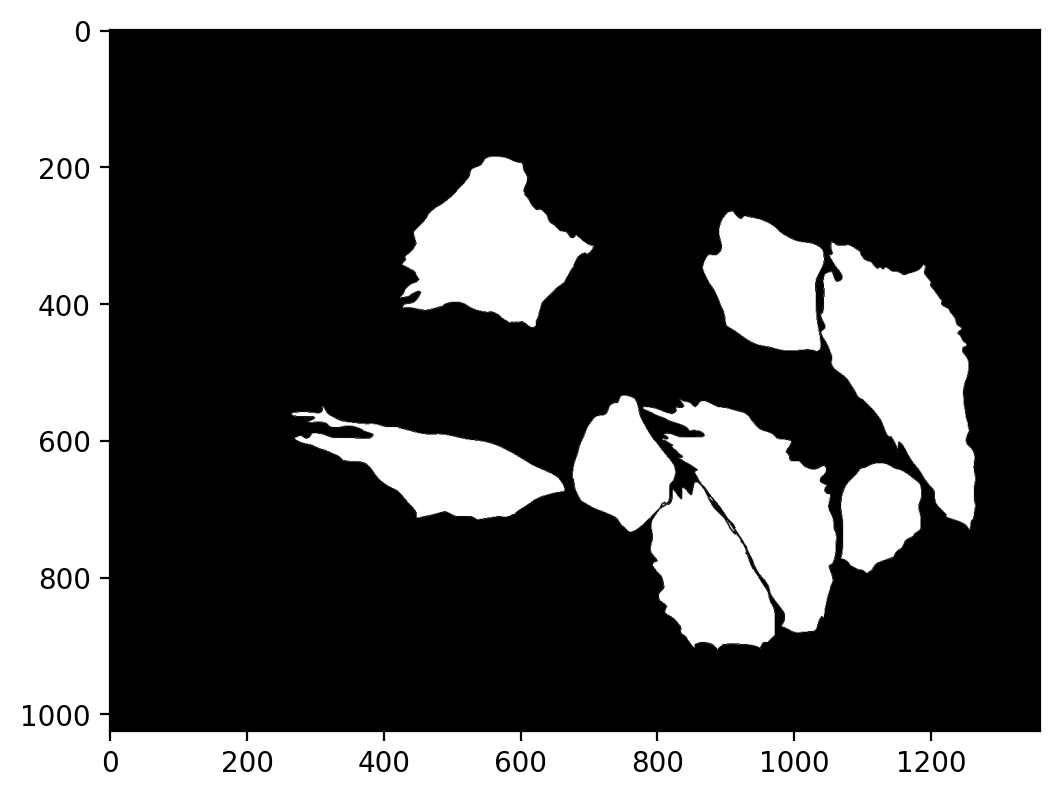

1回目抽出ラベル結果


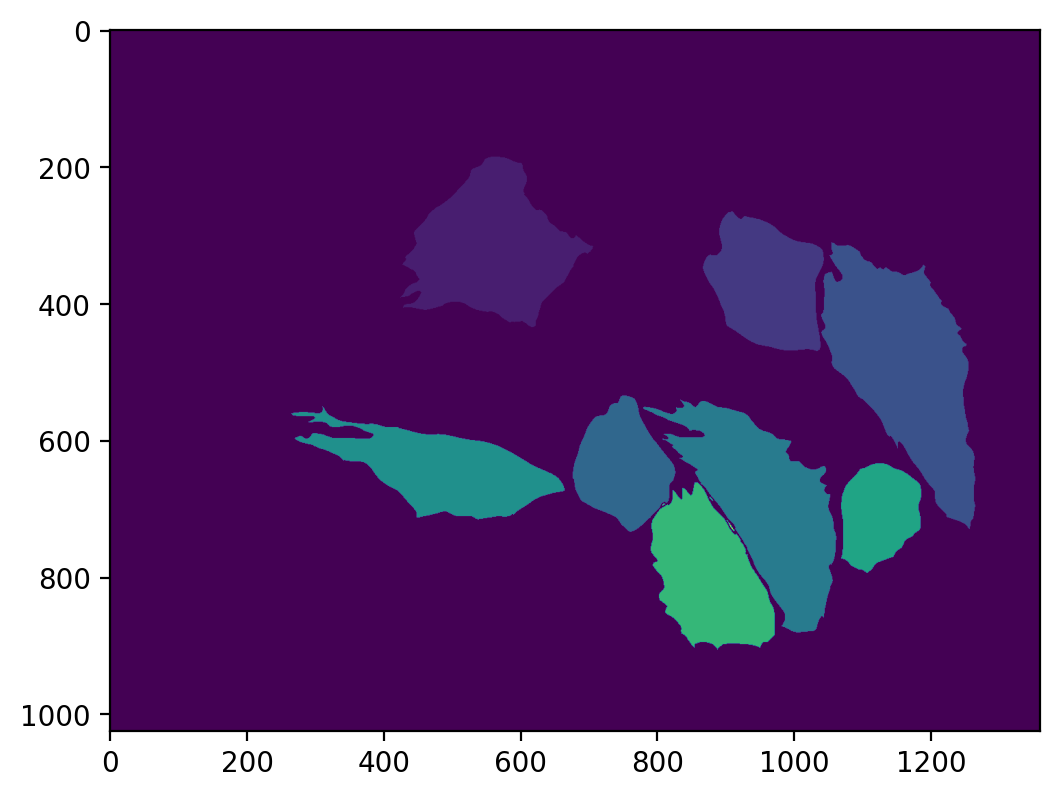

工夫後抽出


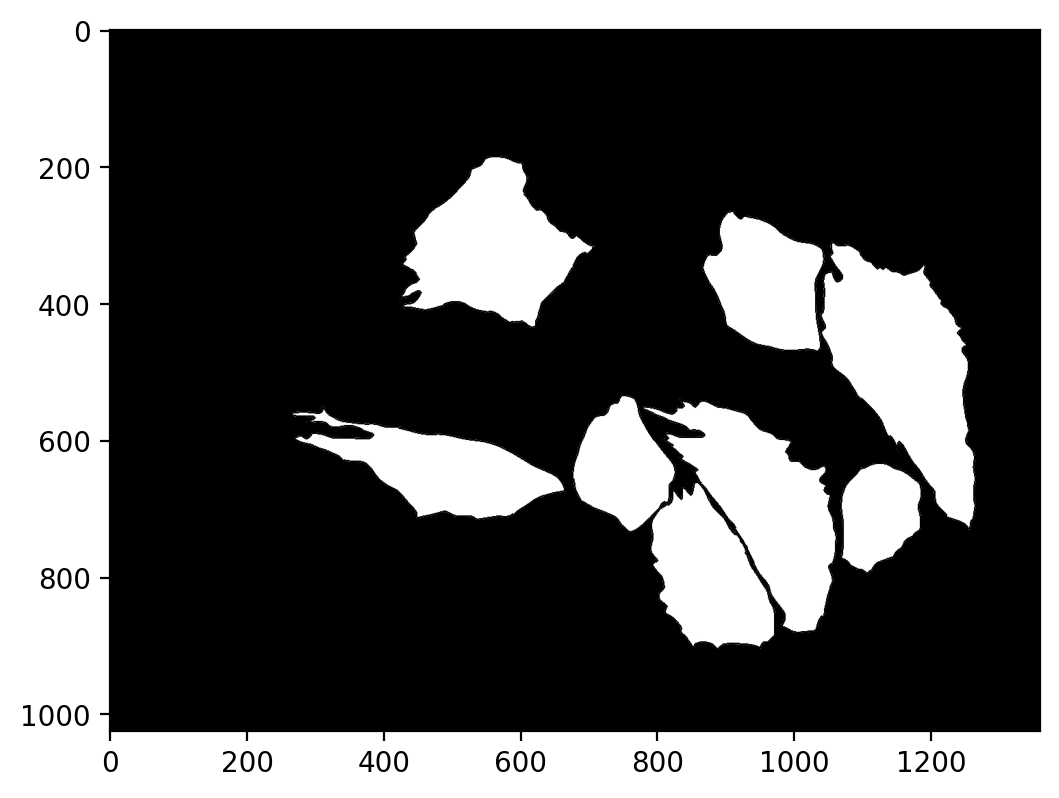

各細胞サイズのピクセル [2404.5625 1531.3125 3123.5    1138.6875 2526.625  1731.      850.5
 1713.125 ]
最終抽出ラベル結果


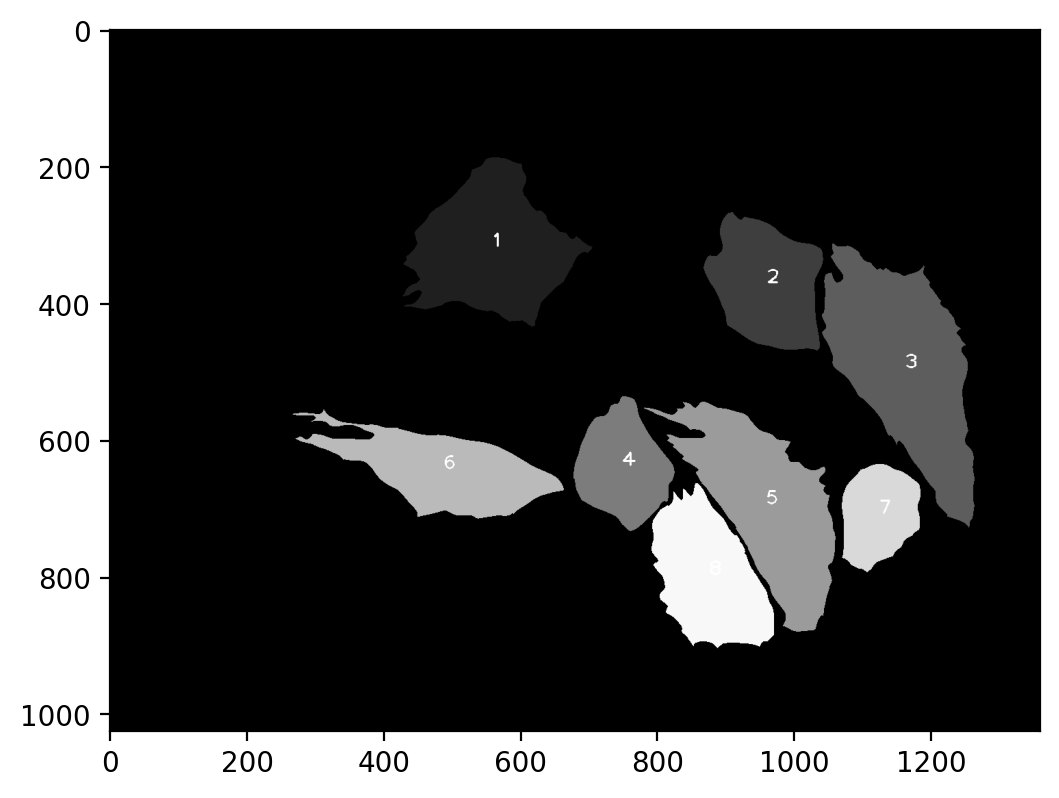

In [3]:
fname="E:bio/1116/48/48_1_1.tif"
img_color= cv2.imread(fname)
img_gray = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
fname="E:bio/1116/48/48_1_2.tif"
img_color= img_color+cv2.imread(fname)
img_gray =img_gray+ cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
fname="E:bio/1116/48/48_1_3.tif"
img_color=img_color+ cv2.imread(fname)
img_gray =img_gray+ cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
fname="E:bio/1116/48/48_1_4.tif"
img_color=img_color+ cv2.imread(fname)
img_gray =img_gray+ cv2.imread(fname,cv2.IMREAD_GRAYSCALE) 
fname="E:bio/1116/48/48_1_5.tif"
img_color=img_color+ cv2.imread(fname) 
img_gray =img_gray+ cv2.imread(fname,cv2.IMREAD_GRAYSCALE) 
fname="E:bio/1116/48/48_1_6.tif"
img_color=img_color+ cv2.imread(fname)
img_gray =img_gray+ cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
fname="E:bio/1116/48/48_1_7.tif"
img_color=img_color+ cv2.imread(fname)
img_gray =img_gray+ cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
fname="E:bio/1116/48/48_1_8.tif"
img_color=img_color+ cv2.imread(fname)
img_gray =img_gray+ cv2.imread(fname,cv2.IMREAD_GRAYSCALE)

threshold=127 #二値化閾値

data_num = 20

points = np.zeros([2,data_num,2],dtype = int)
pt = np.array([0,0])


img=np.copy(img_color)
img2=np.copy(img)
ori_img=np.copy(img_color)
cv2.namedWindow("window", cv2.WINDOW_KEEPRATIO)

cv2.setMouseCallback("window", mouse_event)



flag=1


#画像エリア選択
#----------------------------------------------------
while True:
    cv2.imshow("window", img_color)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cv2.destroyAllWindows()

#------------------------------------------------------
real_points=[]
for i,j in enumerate(points[0]):
    if np.any(j!=[0,0]):
        real_points.append(tuple(j))
real_points=np.array(tuple(real_points))

cv2.polylines(img2, [real_points], None, (0,0,0))

gray_img=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)



ret, img_binary= cv2.threshold(gray_img, threshold, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
cv2.drawContours(img2, contours, -1, (0,0,0), 1)
print("1回目抽出")
show(img2)
labeled_img=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
ret, labeled_img= cv2.threshold(labeled_img, threshold, 255, cv2.THRESH_BINARY)
nb_components, output, stats, centroids=cv2.connectedComponentsWithStats(labeled_img, connectivity=8)

#ここからちょっとした工夫
rate=255//(nb_components-1)
print("1回目抽出ラベル結果")
show(output)
output*=rate
output=to_binary(output)

contours, hierarchy = cv2.findContours(output, cv2.RETR_FLOODFILL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2, contours, -1, (0,0,0), 1) 
print("工夫後抽出")
show(img2)
labeled_img=cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
ret, labeled_img= cv2.threshold(labeled_img, threshold, 255, cv2.THRESH_BINARY)
nb_components, output, stats, centroids=cv2.connectedComponentsWithStats(labeled_img, connectivity=8)


rate=255//(nb_components-1)

output*=rate

#バウンディングボックス
#output = cv2.rectangle(output,(stats[3][0],stats[3][1]),(stats[3][0]+stats[3][2],stats[3][1]+stats[3][3]),(255,255,0),2)

delete_key=[]
true_centroids=[]
real_stats=[]
real_unique=np.unique(output)
for key,i in enumerate(stats):
    if key==0:
        continue
    if i[4]<=1000:
        delete_key.append(key)
        real_unique=np.delete(real_unique,key)
    else:
        true_centroids.append(centroids[key])
        real_stats.append(stats[key,4])
real_unique=real_unique[1:]
obj_count=nb_components-1-len(delete_key)

"""print(obj_count, key)
print(nb_components-1)"""

show_output=np.copy(output)
    
for num,i in enumerate(true_centroids):
    cv2.putText(show_output, "{}".format(num+1), (int(i[0]),int(i[1])), cv2.FONT_HERSHEY_PLAIN, 2, (255,253,255), 2, cv2.LINE_AA)



print("各細胞サイズのピクセル",np.array(real_stats)*((50/200)**2))

print("最終抽出ラベル結果")
show(show_output,gray=1)




In [4]:
mit_path="E:bio/1116/3-48-x40-1-04.tif"
he_path="E:bio/1116/3-48-x40-1-02.tif"
mit_img=cv2.imread(mit_path)
    
#核画像マスク生成
he_img= cv2.imread(he_path)
he_img=cv2.cvtColor(he_img,cv2.COLOR_BGR2GRAY)
dis_he_img=cut(he_img,cut_c="bl",cut_val=30)
binary_he_img=to_binary(dis_he_img)

#ミトコンドリア画像マスク生成
mit_img=sharp(mit_img)
#精鋭フィルター適応
#show(mit_img,c=-1)

gray_mit_img=cv2.cvtColor(mit_img,cv2.COLOR_BGR2GRAY)
dis_img=cut(gray_mit_img,cut_c="bl",cut_val=60)#cut_val=60適正ライン
binary_mit_img=to_binary(dis_img)


#差分
marge=gray_check(binary_mit_img-binary_he_img)



potial_mit_arr=[]
potial_he_arr=[]
potial_marge_binary_arr=[]



"""

#--------------------------------------------------------------------------------
#チェック


#マージ画像
show(marge)
#ミトの2値
show(binary_mit_img)
#核の2値
show(binary_he_img)
#ミトのフィルター後の画像
show(mit_img,c=-1)

#--------------------------------------------------------------------------------

"""
val_arr=[]
for val in real_unique:
    mask_img=np.copy(output)  
    np.place(mask_img,mask_img!=val,0)
    np.place(mask_img,mask_img==val, 255)
    
    
    potial_mit_img=(mask_img/255)*gray_mit_img
    potial_mit_arr.append(potial_mit_img)
    
    
    potial_he_img=(mask_img/255)*binary_he_img
    
    potial_marge_img=(mask_img/255)*marge
    potial_he_arr.append(potial_he_img)
    
    

    
    potial_marge_binary_arr.append(potial_marge_img)
    
    val_arr.append(val)
    print("画素値",val)

potial_he_arr=np.array(potial_he_arr)
potial_marge_binary_arr=np.array(potial_marge_binary_arr)
potial_mit_arr=np.array(potial_mit_arr)



画素値 31
画素値 62
画素値 93
画素値 124
画素値 155
画素値 186
画素値 217
画素値 248


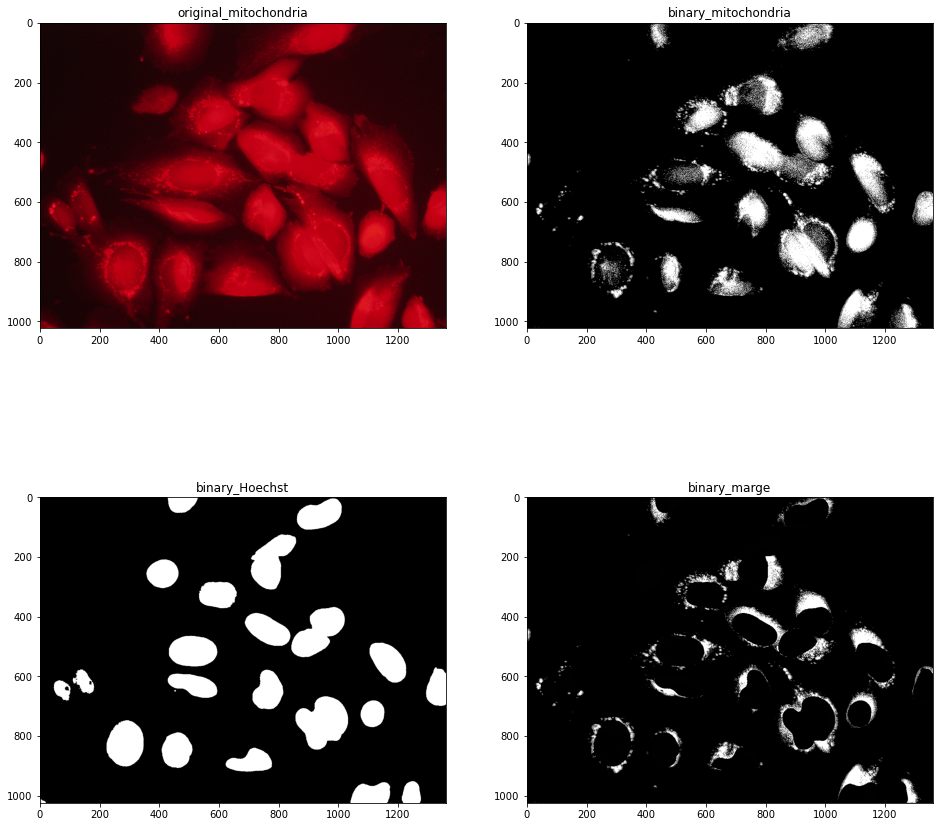

248


<Figure size 432x288 with 0 Axes>

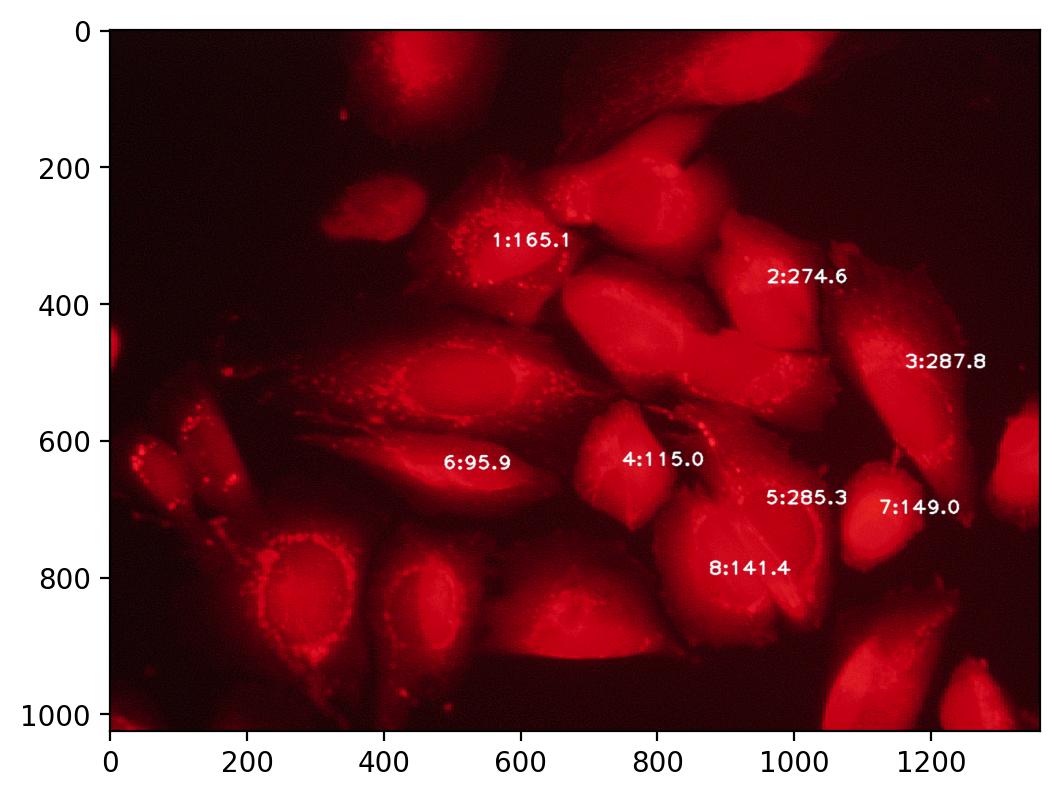

In [5]:

fig,ax=plt.subplots(2,2,figsize=(16,16))
arr=list([cv2.cvtColor(mit_img,cv2.COLOR_BGR2RGB),binary_mit_img,binary_he_img,marge])
img_name=["original_mitochondria","binary_mitochondria","binary_Hoechst","binary_marge"]
arr=arr[::-1]
img_name=img_name[::-1]
for i in range(2):
    for k in range(2):
        ax[i][k].imshow(arr.pop())
        ax[i][k].set_title("{}".format(img_name.pop()))
        
        
plt.gray()
plt.show()
plt.clf()

area_arr=[]
for i in potial_marge_binary_arr:
    area=measure_s(i,c="bl",th=50,res=1)
    area_arr.append(area)

show_output=np.copy(mit_img)
print(val)
text_color=np.random.randint(val_arr[2]+1,val_arr[3])
for num,i in enumerate(true_centroids):
    cv2.putText(show_output, "{}:{:.1f}".format(num+1,area_arr[num]), (int(i[0]),int(i[1])), cv2.FONT_HERSHEY_PLAIN,2, (255,255,243), 2, cv2.LINE_AA)


show(show_output,c=-1)

